## What I learn here:

#SVM
#Import multiple csv files into pandas and concatenate into one DataFrame
#reshape(-1,1) reshape arraye to one column and many rows
#Unbalanced data refers to classification problems where we have unequal instances for different classes. 

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

### train dataset

In [2]:
#Import multiple csv files into pandas
#https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
import glob   #glob module is used to retrieve files/pathnames matching a specified pattern.
path=r'E:\one-Drive\OneDrive - Auburn University\Mohammad is Data Scientist\SVM\Extra\train'
all_files=glob.glob(path + "/*.csv")  #put multiple csv files into a list 

e1 =[]

for file in all_files:
    df1=pd.read_csv(file, index_col= None , header=0)   #convert csv file to pandas
    e1.append(df1)
    
dataConcat1=pd.concat(e1 , axis=0 , ignore_index=True , sort=True)  #concatenate all test data into one DataFrame

In [3]:
X_train= dataConcat1.iloc[:,1]
y_train=dataConcat1.iloc[:,2]

### import validation dataset

In [4]:
#Import multiple csv files into pandas
import glob   #glob module is used to retrieve files/pathnames matching a specified pattern.
path=r'E:\one-Drive\OneDrive - Auburn University\Mohammad is Data Scientist\SVM\Extra\val'
all_files2=glob.glob(path + "/*.csv")  #put multiple csv files into a list 

e2 =[]

for file in all_files2:
    df2=pd.read_csv(file, index_col= None , header=0) #convert csv file to pandas
    e2.append(df2)
    
dataConcat2=pd.concat(e2 , axis=0 , ignore_index=True , sort=True)  #concatenate all validation data into one DataFrame

In [5]:
X_valid= dataConcat2.iloc[:,1]
y_valid=dataConcat2.iloc[:,2]

### import test dataset

In [6]:
#Import multiple csv files into pandas
import glob   #glob module is used to retrieve files/pathnames matching a specified pattern.
path=r'E:\one-Drive\OneDrive - Auburn University\Mohammad is Data Scientist\SVM\Extra\test'
all_files3=glob.glob(path + "/*.csv")  #put multiple csv files into a list 

e3 =[]

for file in all_files3:
    df3=pd.read_csv(file, index_col= None , header=0) #convert csv file to pandas
    e3.append(df3)
    
dataConcat3=pd.concat(e3 , axis=0 , ignore_index=True , sort=True)  #concatenate all test data into one DataFrame

In [7]:
X_test= dataConcat3.iloc[:,1]
y_test=dataConcat3.iloc[:,2]

In [8]:
type(y_test)

pandas.core.series.Series

## spliting dataset to train, validation and test  
#### when we have all dataset in 1 file , but in GE project because our data are timesearies we do not do this.

In [9]:
# from sklearn.model_selection import train_test_split
# X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)  #train and remaining
# X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.15) #test and validation

# Preperation & Scaling

## convert datasets to 2D arrays

In [10]:
#scaling of 1d array is not possible
#reshaping train
X_train =(np.array(X_train)).reshape(-1,1)  
y_train =(np.array(y_train))               #we do not need to change shape of X

#reshaping validation
X_valid =(np.array(X_valid)).reshape(-1,1)
#y_valid =(np.array(y_valid)).reshape(-1,1)
y_valid =(np.array(y_valid))
#reshaping test
X_test =(np.array(X_test)).reshape(-1,1)
y_test =(np.array(y_test))

using different methods for scaling of train and tets
#https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [11]:
#scaling
#https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # transformer and also saving scalars(mean , std) after fitting

In [14]:
# get scalers of train transform datasets    
X_train = sc.fit_transform(X_train)   #fit to get scalers (mean, std) transform for rescaling
X_valid =sc.transform(X_valid) # get scalers of train transform train , use scalers of train to transform test
X_test = sc.transform(X_test) #use scalerrs of train for transforming any unseen data(test)

# Training the SVM model on the Training set

In [15]:
# classifier =SVC(kernel= 'rbf' , C=1 , probability=True) #why C=1 ?   
# classifier.fit(X_train,y_train)

### Hyperparameter Tuning

In [35]:
# set parameters (C, gamma, kernel) for hyperparameter tuning
param_distributions={'C': [0.1,1,10,100,500,1000] , 'kernel':['rbf','linear','poly','sigmoid'], 'degree':[1,2,3,4,5,6], 'gamma':[1,0.1,0.01,0.001,0.0001,'scale','Auto']}  

In [36]:
# param_grid={'C': [0.1,1,10,100] , 'kernel':['rbf','linear','poly','sigmoid'], 'degree':[1,2,3,4,5,6], 'gamma':[1,0.1,0.01,0.001,0.0001]}  

#### Work on Halving SearchCv : it is faster but everytime it gives us different best parameters.
https://scikit-learn.org/stable/modules/grid_search.html#searching-for-optimal-parameters-with-successive-halving

In [37]:
#Setup HalvingRnadonSearchCV
from sklearn.svm import SVC   #support vector classification
from sklearn.experimental import enable_halving_search_cv  # explicitly require this experimental feature
from sklearn.model_selection import HalvingRandomSearchCV
estimator=SVC(probability=True,class_weight='balanced') #setup estimator
HRSC=HalvingRandomSearchCV(estimator, param_distributions)

In [ ]:
# fit the tuned model on train dataset
HRSC.fit(X_train,y_train)

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 1008 is smaller than n_iter=8559. Running 1008 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 216, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'Auto' instead.

  FitFailedWarning)
C:\Users\mzm0181\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

In [34]:
print(HRSC.best_params_)  #best parameters
#print(HRSC.score(X_train,y_train))  # best accuracy

{'kernel': 'poly', 'gamma': 'Auto', 'C': 1000}


### Model after Tuning

In [236]:
classifier =SVC(kernel= 'rbf' , C=100 , probability=True,class_weight='balanced',gamma=1)
classifier=classifier.fit(X_train,y_train)

# Prediction & Evaluation 

In [237]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report as cr      #for precision , recall , F1
from sklearn.metrics import roc_auc_score   #roc_auc

In [238]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn

### Train dataset

In [239]:
#predicting with the model
y_pred_train=classifier.predict(X_train)

In [170]:
# assign y_true , y_pred
y_true=y_train
y_pred=y_pred_train

In [171]:
#compare y_pred and y_actual
#compare=np.concatenate((y_pred.reshape(len(y_pred),1), y_true.reshape(len(y_true),1)),1)
#convert array to pd
#array_pd=pd.DataFrame(compare ,columns=['y_pred_train','y_train'])
#pd.set_option('display.max_rows',None) 
#array_pd

In [240]:
#accuracy and confusion matrix 
cm=confusion_matrix(y_true,y_pred )   #confusion matrix
ac=accuracy_score(y_true, y_pred)     #accuracy
print('Accuracy :  {:}'.format(round(ac,2)))
print('Confusion Matrix :\n {:}'.format(cm))

Accuracy :  0.89
Confusion Matrix :
 [[5830    0    0    0]
 [   0 5094    0    0]
 [ 265 1775 8264  590]
 [   0    0    0 3050]]


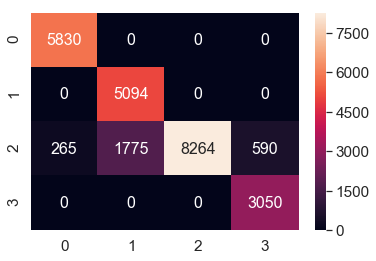

In [241]:
#Heatmap for confiusion matrix
df_cm = pd.DataFrame(cm)
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
plt.savefig('Heatmap_Confusion_Train_SVM_Balanced.png')   ###<<----- Change Station number
b, t = plt.ylim() 

In [217]:
#other evaluation criteria
labels=['Cruise','Idle','Other','Taxi'] # the order is important because python put labels in the confusion matrix based on
                                        # their alphabetic orders
                                    
print(cr(y_true,y_pred, target_names=labels))

              precision    recall  f1-score   support

      Cruise       0.96      1.00      0.98      5830
        Idle       0.74      1.00      0.85      5094
       Other       1.00      0.76      0.86     10894
        Taxi       0.84      1.00      0.91      3050

    accuracy                           0.89     24868
   macro avg       0.88      0.94      0.90     24868
weighted avg       0.92      0.89      0.89     24868



In [175]:
#AUC & ROC
y_predProb=classifier.predict_proba(X_train)  #for auc&roc we need to use predict_proba instead of predict

print(roc_auc_score(y_true, y_predProb, multi_class='ovr'))

0.9634900378834207


### Validation Dataset

In [176]:
#apply model on  dataset
y_pred_valid=classifier.predict(X_valid)

In [177]:
# assign y_true , y_pred
y_true2=y_valid
y_pred2=y_pred_valid

In [192]:
#accuracy and confusion matrix 
cm2=confusion_matrix(y_true2,y_pred2)   #confusion matrix
ac=accuracy_score(y_true2, y_pred2)     #accuracy
print('Accuracy :  {:}'.format(round(ac,2)))
print('Confusion Matrix :\n {:}'.format(cm2))

Accuracy :  0.92
Confusion Matrix :
 [[1271    0    0    0]
 [   0 1256    0    0]
 [  17   99 1467   44]
 [   0    0  227  683]]


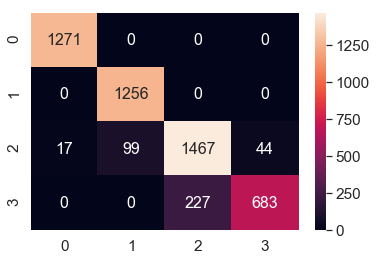

In [211]:
#Heatmap for confiusion matrix
df_cm2 = pd.DataFrame(cm2)
sn.set(font_scale=1.4)
sn.heatmap(df_cm2, annot=True, annot_kws={"size": 16}, fmt='g')
plt.savefig('Heatmap_Confusion_Validation_SVM_Balanced.png')   ###<<----- Change Station number
b, t = plt.ylim() 

In [219]:
#other evaluation criteria
labels=['Cruise','Idle','Other','Taxi']  # the order is important , they are alphabetically sort
print(cr(y_true2,y_pred2, target_names=labels))

              precision    recall  f1-score   support

      Cruise       0.99      1.00      0.99      1271
        Idle       0.93      1.00      0.96      1256
       Other       0.87      0.90      0.88      1627
        Taxi       0.94      0.75      0.83       910

    accuracy                           0.92      5064
   macro avg       0.93      0.91      0.92      5064
weighted avg       0.92      0.92      0.92      5064



In [181]:
#AUC & ROC
y_pred_prob2=classifier.predict_proba(X_valid)  #for auc&roc we need to use predict_proba instead of predict
print(roc_auc_score(y_true2, y_pred_prob2, multi_class='ovr'))

0.9874328241216257


### Test Dataset

In [242]:
#apply model on  dataset
y_pred_test=classifier.predict(X_test)

In [243]:
# assign y_true , y_pred
y_true3=y_test
y_pred3=y_pred_test

In [244]:
#accuracy and confusion matrix 
cm3=confusion_matrix(y_true3,y_pred3)   #confusion matrix
ac=accuracy_score(y_true3, y_pred3)     #accuracy
print('Accuracy :  {:}'.format(round(ac,2)))
print('Confusion Matrix :\n {:}'.format(cm3))

Accuracy :  0.93
Confusion Matrix :
 [[18217     0     3     0]
 [    0 18772   689     0]
 [  470  1512 22978   996]
 [    0     0  1382  9971]]


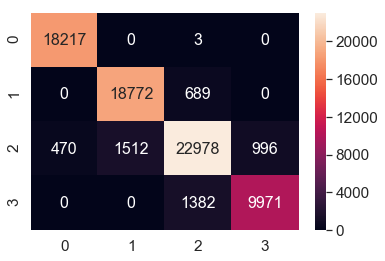

In [245]:
#Heatmap for confiusion matrix
df_cm3 = pd.DataFrame(cm3)
sn.set(font_scale=1.4)
sn.heatmap(df_cm3, annot=True, annot_kws={"size": 16}, fmt='g')
plt.savefig('Heatmap_Confusion_Test_SVM_Balanced.png')   ###<<----- Change Station number
b, t = plt.ylim() 

In [246]:
#other evaluation criteria
labels=['Cruise','Idle','Other','Taxi']
print(cr(y_true3,y_pred3, target_names=labels))

              precision    recall  f1-score   support

      Cruise       0.97      1.00      0.99     18220
        Idle       0.93      0.96      0.94     19461
       Other       0.92      0.89      0.90     25956
        Taxi       0.91      0.88      0.89     11353

    accuracy                           0.93     74990
   macro avg       0.93      0.93      0.93     74990
weighted avg       0.93      0.93      0.93     74990



In [248]:
#AUC & ROC
y_pred_prob3=classifier.predict_proba(X_test)  #for auc&roc we need to use predict_proba instead of predict
print(roc_auc_score(y_true3, y_pred_prob3, multi_class='ovr'))

0.9688117206252396


In [226]:
a=10
b=a
b=19

In [227]:
a

10